In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

/home/romil/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#Loading dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#Splitting the dataset into train and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X_train_new = X_train[:,6:7]
X_test_new = X_test[:,6:7]


In [7]:
y_train = np.reshape(y_train, (339,1))
y_test = np.reshape(y_test,(167,1))

In [8]:
import pymc3 as pm
X = X_train_new

/home/romil/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [x, Intercept, sigma]
100%|██████████| 2500/2500 [00:04<00:00, 528.17it/s]
The acceptance probability does not match the target. It is 0.8844956256645922, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


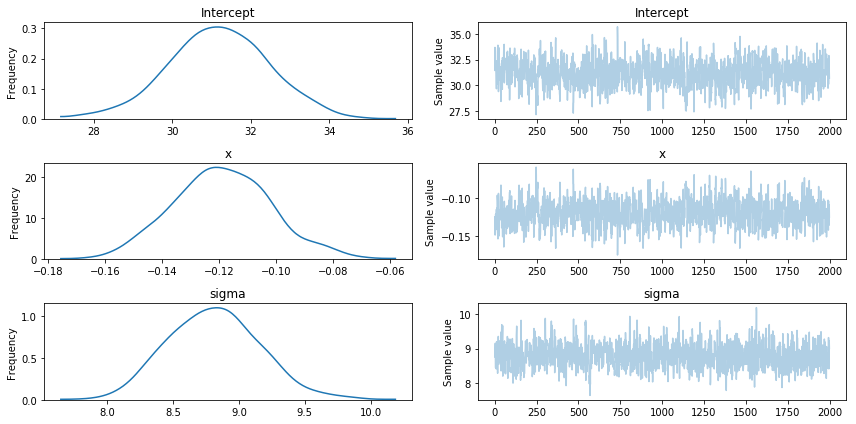

In [11]:
with pm.Model() as model: 
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', 0, sd=20)
    x_coeff = pm.Normal('x', 0, sd=20)

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + x_coeff * X,
                        sd=sigma, observed=y_train)

    # Inference!
    trace = pm.sample(2000,chains =1,cores=4)
pm.traceplot(trace)
plt.show()


Above plot has returned the histogram of samples.
And we can see for the intercept, peak is around``` 31```.
for the x peak is around ```-0.12``` which would be our slope.

## Visualization

In [15]:
def plot_lin(X,y,slope,c):
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.scatter(X,y,label='Data')
    plt.plot(X,X*slope + c,label = 'line', color = 'g')
    ax.legend()
    plt.show()

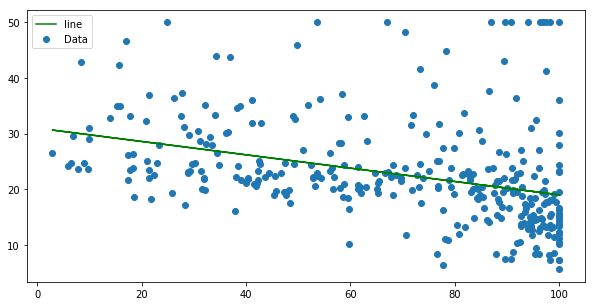

In [16]:
X = X_train_new
y = y_train
slope = -0.12
c = 31
plot_lin(X,y,slope,c)